In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from skeleton import skeleton
from matplotlib.animation import FFMpegWriter
import cv2 
from math import atan2
from scipy import ndimage

home_dir = '/data/LiftFly3D/prism/'
data_dir = '/mnt/NAS/SG/prism_data/'

border_width = 105
threshold = 45
bbox_width = 550
horiz_crop = 440

In [2]:
crop_positions = ['/bottom_view/videos/crop_loc_191125_PR_Fly1_001_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly1_002_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly1_003_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly1_004_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_001_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_002_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_003_prism.txt',
                  '/bottom_view/videos/crop_loc_191125_PR_Fly2_004_prism.txt']

im_full = ['191125_PR/Fly1/001_prism/behData/images/',
           '191125_PR/Fly1/002_prism/behData/images/',
           '191125_PR/Fly1/003_prism/behData/images/',
           '191125_PR/Fly1/004_prism/behData/images/',
           '191125_PR/Fly2/001_prism/behData/images/',
           '191125_PR/Fly2/002_prism/behData/images/',
           '191125_PR/Fly2/003_prism/behData/images/',
           '191125_PR/Fly2/004_prism/behData/images/']

images_side = ['191125_PR/Fly1/001_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly1/002_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly1/003_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly1/004_prism/behData/images/side_view_prism_data_191125_PR_Fly1/',
               '191125_PR/Fly2/001_prism/behData/images/side_view_prism_data_191125_PR_Fly2/',
               '191125_PR/Fly2/002_prism/behData/images/side_view_prism_data_191125_PR_Fly2/',
               '191125_PR/Fly2/003_prism/behData/images/side_view_prism_data_191125_PR_Fly2/',
               '191125_PR/Fly2/004_prism/behData/images/side_view_prism_data_191125_PR_Fly2/']

images_bottom =  ['191125_PR/Fly1/001_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly1/002_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly1/003_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly1/004_prism/behData/images/bottom_view_prism_data_191125_PR_Fly1/',
                  '191125_PR/Fly2/001_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/',
                  '191125_PR/Fly2/002_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/',
                  '191125_PR/Fly2/003_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/',
                  '191125_PR/Fly2/004_prism/behData/images/bottom_view_prism_data_191125_PR_Fly2/']

DLC_predictions = ['191125_PR_Fly1_001_prism.pkl',
                  '191125_PR_Fly1_002_prism.pkl',
                  '191125_PR_Fly1_003_prism.pkl',
                  '191125_PR_Fly1_004_prism.pkl',
                  '191125_PR_Fly2_001_prism.pkl',
                  '191125_PR_Fly2_002_prism.pkl',
                  '191125_PR_Fly2_003_prism.pkl',
                  '191125_PR_Fly2_004_prism.pkl']

In [8]:
#crop loc file
def read_crop_pos(file):
    f=open(file, "r")
    contents =f.readlines()
    im_file = []
    x_pos = []
    for i in range(4,len(contents)):
        line = contents[i][:-1].split(' ')
        im_file.append(line[0])
        x_pos.append(line[1])
        
    return im_file, x_pos


def plot_skeleton(x, y,id_range, color_edge,  ax=None):
           
    for i, j in enumerate(G.edges()): 
        if (j[0] >= id_range[0]) & (j[0] <= id_range[1]) & (j[0] >= id_range[0]) & (j[1] <= id_range[1]):
            u = np.array((x[j[0]], x[j[1]]))
            v = np.array((y[j[0]], y[j[1]]))
            if ax is not None:
                ax.plot(u, v, c=color_edge[j[0]], alpha=1.0, linewidth = 2)
            else:
                plt.plot(u, v, c=color_edge[j[0]], alpha=1.0, linewidth = 2)

im_file, x_pos = read_crop_pos(home_dir + crop_positions[3])

In [9]:
#load DLC predictions
poses = pickle.load(open(home_dir + 'data_unoriented/' + DLC_predictions[3], 'rb'))
index = poses['index']
flip_idx = poses['flip_idx']
G, color_edge = skeleton()

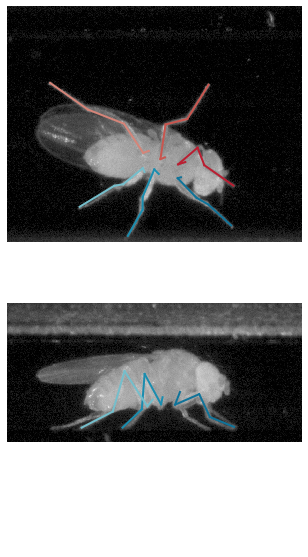

In [10]:
#cropped image
i = 1

bottom = poses['points2d'][0,i,:,:]
side = poses['points2d'][1,i,:,:]

im_crop_bottom = cv2.imread(data_dir + images_bottom[3] + im_file[index[i]],cv2.IMREAD_GRAYSCALE)
im_crop_side = cv2.imread(data_dir + images_side[3] + im_file[index[i]],cv2.IMREAD_GRAYSCALE)

bottom_x = bottom[:,0]
bottom_y = bottom[:,1]
side_x = side[:,0]
side_y = side[:,1]

f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(20,10))

ax1.imshow(im_crop_bottom,cmap='gray', vmin=0, vmax=255)
ax2.imshow(im_crop_side,cmap='gray', vmin=0, vmax=255)
ax1.set_axis_off()
ax2.set_axis_off()

plot_skeleton(bottom_x, bottom_y, [0,29], color_edge, ax1)
if flip_idx[i]==0:
    plot_skeleton(side_x, side_y, [0,15], color_edge, ax2)
if flip_idx[i]==1:
    plot_skeleton(side_x, side_y, [15,29], color_edge, ax2)
#plt.savefig('DLC_pred.svg')

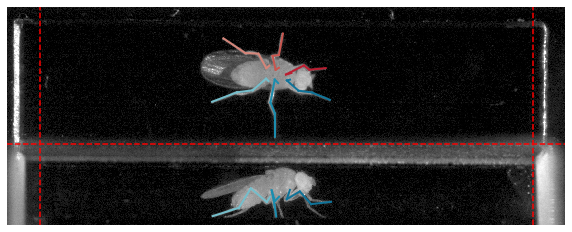

In [12]:
#full image
fig = plt.figure(figsize=(10,6))
            
metadata = dict(title='LiftFly3D prediction', artist='Nely',comment='Watch this!')
writer = FFMpegWriter(fps=25, metadata=metadata)
with writer.saving(fig, "DLC_prediction.mp4", 100):
    for i in range(1000):
        pos_pred = []
        pos_tar = []
        
        plt.cla()
        
        bottom = poses['points2d'][0,i,:,:]
        side = poses['points2d'][1,i,:,:]

        bottom_x = bottom[:,0]
        bottom_y = bottom[:,1]
        side_x = side[:,0]
        side_y = side[:,1]

        im = plt.imread(data_dir + im_full[3] + im_file[index[i]])

        plt.imshow(im,cmap='gray', vmin=0, vmax=255)
        plt.axhline(horiz_crop, color="red", linestyle="--")
        plt.axvline(border_width, color="red", linestyle="--")
        plt.axvline(im.shape[1] - border_width, color="red", linestyle="--")
                 
        plot_skeleton(border_width + bottom_x + int(x_pos[index[i]]), bottom_y, [0,29], color_edge)
        if flip_idx[i]==0:
            plot_skeleton(border_width + side_x + int(x_pos[index[i]]), horiz_crop + side_y, [0,15], color_edge)
        if flip_idx[i]==1:
            plot_skeleton(border_width + side_x + int(x_pos[index[i]]), horiz_crop + side_y, [15,29], color_edge)
            
        #plt.text(50,100, str(flip_idx[i]), color='white', fontsize=20)
        
        plt.axis('off')
        writer.grab_frame()    